In [2]:
# @Date:   2019-05-10T13:35:26+08:00
# @Email:  1730416009@stu.suda.edu.cn
# @Project: M_Rlanguage
# @Last modified time: 2019-05-10T13:35:27+08:00


# ------------------------------------------------------------------------------
## [Description]
### This function calculates the fold-change and p-value of two groups.
## [Input]
### dataframe -> the grouped data; groupVector_a/b --> a vector of groupA that represent the column index;
## [Output]
### returns the input dataframe with two additional(new) columns: 'fold_change', 'p_value'
## [Details]
### When calculating the p-value, this function use for-loop to get the results
# ------------------------------------------------------------------------------
get_Ttest_Result_1 <- function(dfrm, groupVector_a, groupVector_b){
    # Get the average value of sample group A (non-smokers) & group B (smokers)
    non_smoker_mean <- apply(dfrm[, groupVector_a], 1, mean)
    smoker_mean <- apply(dfrm[, groupVector_b], 1, mean)
    # Calculate the fold-change
    fold_change <- smoker_mean / non_smoker_mean
    fold_change_dfrm <- as.data.frame(fold_change)

    # Use for-loop to apply t.test and get results of p-value
    p_value <- c()
    for(i in 1:(dim(dfrm)[1]-1)){ # Ignore the NA value
        p_value <- append(p_value, t.test(dfrm[i, groupVector_a], dfrm[i, groupVector_b])$p.value)
    }
    p_value <- append(p_value, NA) # Handle the NA value
    p_value_dfrm <- as.data.frame(p_value)

    # Add two new columns to the input dfrm
    dfrm <- cbind(dfrm, fold_change_dfrm, p_value_dfrm)
    # Return Value
    return(dfrm)
}


# ------------------------------------------------------------------------------
## [Description]
### This function calculates the fold-change and p-value of two groups.
## [Input]
### dataframe -> the grouped data; groupVector_a/b --> a vector of groupA that represent the column index;
## [Output]
### returns the input dataframe with two additional(new) columns: 'fold_change', 'p_value'
## [Details]
### When calculating the p-value, this function use apply() to get the results
## [Notes]
### This function is faster than get_Ttest_Result_2()
# ------------------------------------------------------------------------------
get_Ttest_Result_2 <- function(dfrm, groupVector_a, groupVector_b){
    # Get the average value of sample group A (non-smokers) & group B (smokers)
    non_smoker_mean <- apply(dfrm[, groupVector_a], 1, mean)
    smoker_mean <- apply(dfrm[, groupVector_b], 1, mean)
    # Calculate the fold-change
    fold_change <- smoker_mean / non_smoker_mean
    fold_change_dfrm <- as.data.frame(fold_change)

    # Use apply() to apply t.test and get results of p-value
    ## Use tempFunction to get p-value
    p_value <- apply(dfrm[1:(dim(dfrm)[1]-1),], 1, function(x) t.test(as.numeric(x[groupVector_a]),as.numeric(x[groupVector_b]))$p.value)
    p_value <- append(p_value, NA) # Handle the NA value
    p_value_dfrm <- as.data.frame(p_value)

    # Add two new columns to the input dfrm
    dfrm <- cbind(dfrm, fold_change_dfrm, p_value_dfrm)
    # Return Value
    return(dfrm)
}

In [3]:
dfrm <- read.csv('C:\\Users\\Nature\\Desktop\\M_RLanguage\\Lab_6\\GSE5056_series_matrix.txt',
                header = TRUE, sep='\t')
# dfrm_1 <- get_Ttest_Result_1(dfrm, 2:19, 20:45)
dfrm_2 <- get_Ttest_Result_2(dfrm, 2:19, 20:45)

In [5]:
dfrm_2

,ID_REF,GSM114034,GSM114035,GSM114036,GSM114037,GSM114038,GSM114039,GSM114040,GSM114041,GSM114042,...,GSM114070,GSM114071,GSM114072,GSM114073,GSM114074,GSM114075,GSM114076,GSM114077,fold_change,p_value
1,A28102_at,808.3,1390.2,927.4,2360.4,1811.4,1622.7,687.9,1686.7,725.6,...,860.1,1516.6,827.6,955.0,731.0,601.8,736.2,534.5,1.2205307,0.4646315973
2,AB000114_at,266.2,661.4,231.6,58.9,409.8,1420.4,474.1,313.2,416.7,...,401.3,511.3,451.1,266.8,281.6,259.2,237.7,184.4,1.6738898,0.2057826183
3,AB000115_at,1534.3,1657.5,176.2,1472.0,2263.2,1824.5,3256.6,342.2,715.4,...,431.4,1188.5,1001.8,654.3,915.0,585.0,783.9,981.9,1.1665101,0.6462842946
4,AB000220_at,6734.1,4809.9,566.5,1777.2,1703.8,1873.8,3349.6,506.7,3789.4,...,1767.3,3274.8,6808.7,4181.7,4481.5,3384.0,3779.8,4480.1,1.1164064,0.4837524591
5,AB000381_s_at,213.5,119.6,179.2,189.3,301.5,394.2,104.5,164.8,258.0,...,214.6,19.7,147.9,36.2,37.2,104.6,164.8,139.3,0.7910773,0.3202725473
6,AB000409_at,1259.6,2000.4,115.9,948.0,443.2,1340.9,2002.3,711.9,1727.9,...,1649.8,2041.7,2216.3,2283.3,2462.3,2096.5,1881.8,1788.7,1.2924453,0.1561640071
7,AB000410_s_at,196.2,226.8,416.3,611.0,257.3,457.3,232.0,311.2,254.2,...,275.7,178.3,155.9,134.3,143.2,177.0,252.2,246.6,0.7104267,0.0662604682
8,AB000449_at,738.9,981.9,747.2,770.7,311.2,1031.8,273.3,568.3,923.5,...,680.9,900.6,1163.6,600.0,527.4,415.5,404.6,335.1,1.4421654,0.2666760439
9,AB000450_at,1730.1,2172.4,634.9,92.9,93.7,1494.6,318.5,163.4,1148.2,...,1345.3,1434.2,1388.6,1714.9,1430.8,946.6,1124.3,758.3,1.2933856,0.1630920683
10,AB000460_at,3226.0,4180.1,2324.8,4784.3,2248.0,2046.0,2212.9,1978.4,4025.7,...,3830.3,4688.5,4178.1,4736.3,4023.0,3375.1,4664.3,3401.1,1.0223681,0.7990893435


# 0515 Continue Works
## Requirement
1. 非差异表达 空心
2. 差异表达 非空心
3. 3条辅助线 （2p,1f）


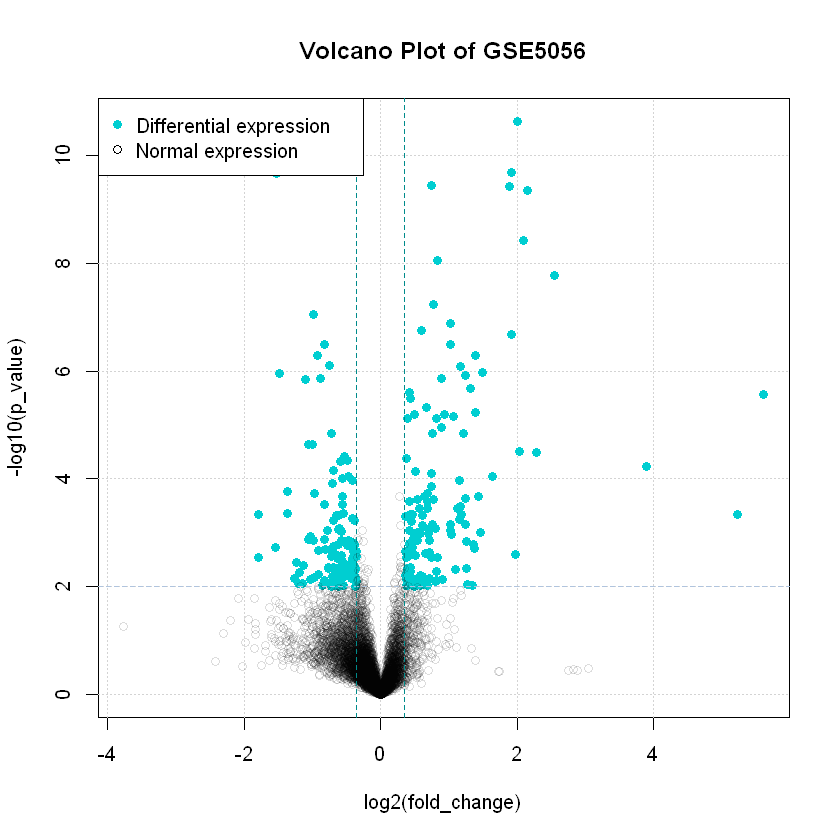

In [6]:
# Plot()
#pdf("Volcano_Plot_of_GSE5056_zzf_0515.pdf")
# Prepare for the Basic plot
plot(log2(dfrm_2$fold_change), -log10(dfrm_2$p_value), type='n', main="Volcano Plot of GSE5056",xlab="log2(fold_change)", ylab="-log10(p_value)")
grid()
# Set the Cutoff
co_p <- 2 # cutoff of p_value: 0.01 (-log10(0.01) = 2)
co_f <- 0.35 # cutoff of fold_change: +-1.274561(log2(cutoff) = +-0.35)
col_p <- rgb(0,206,209,maxColorValue=255)
# Get the SubSet data aaccording to the cutoff
var <- subset(dfrm_2, (fold_change > 2^co_f | fold_change < 2^-co_f) & p_value < 10^-co_p) # differential expression
nor <- subset(dfrm_2, (fold_change <= 2^co_f & fold_change >= 2^-co_f) | p_value >= 10^-co_p)
# Plot the points of different SubSet
points(log2(var$fold_change), -log10(var$p_value), col=col_p, pch = 19)
points(log2(nor$fold_change), -log10(nor$p_value), col = rgb(0, 0, 0, 35, maxColorValue=255))
# plot the lines of cutoff using abline()
abline(h=co_p, col=rgb(176,196,222,maxColorValue=255), lty=2)
abline(v=co_f, col=rgb(0,139,139,maxColorValue=255), lty=2)
abline(v=-co_f, col=rgb(0,139,139,maxColorValue=255), lty=2)
# Add the legend
legend("topleft", pch=c(19,1), , col=c(col_p,rgb(0,0,0)), legend=c('Differential expression','Normal expression'))

#dev.off()